# Prediction Using Unsupervised Machine Learning

From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually

In [1]:
#importing libraries
from sklearn.cluster import KMeans
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
#importing dataset
data = pd.read_csv("Iris.csv")
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
data.drop(['Id'],axis=1,inplace=True)

In [4]:
data.shape

(150, 5)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Data Preprocessing

In [7]:
#checking for NULL values
data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [8]:
#remove the duplicate values
data.drop_duplicates(inplace=True)

In [9]:
#label encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Species']=le.fit_transform(data['Species'])
data['Species'].value_counts()

1    50
2    49
0    48
Name: Species, dtype: int64

## Data Visualization

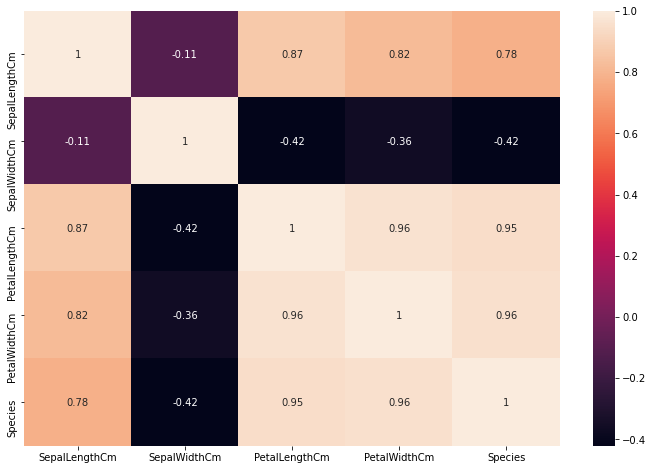

In [10]:
corrdata = data.corr()
ax,fig = plt.subplots(figsize=(12,8))
sns.heatmap(corrdata,annot=True)

Species is majorly influenced by Petal Length and Petal Width

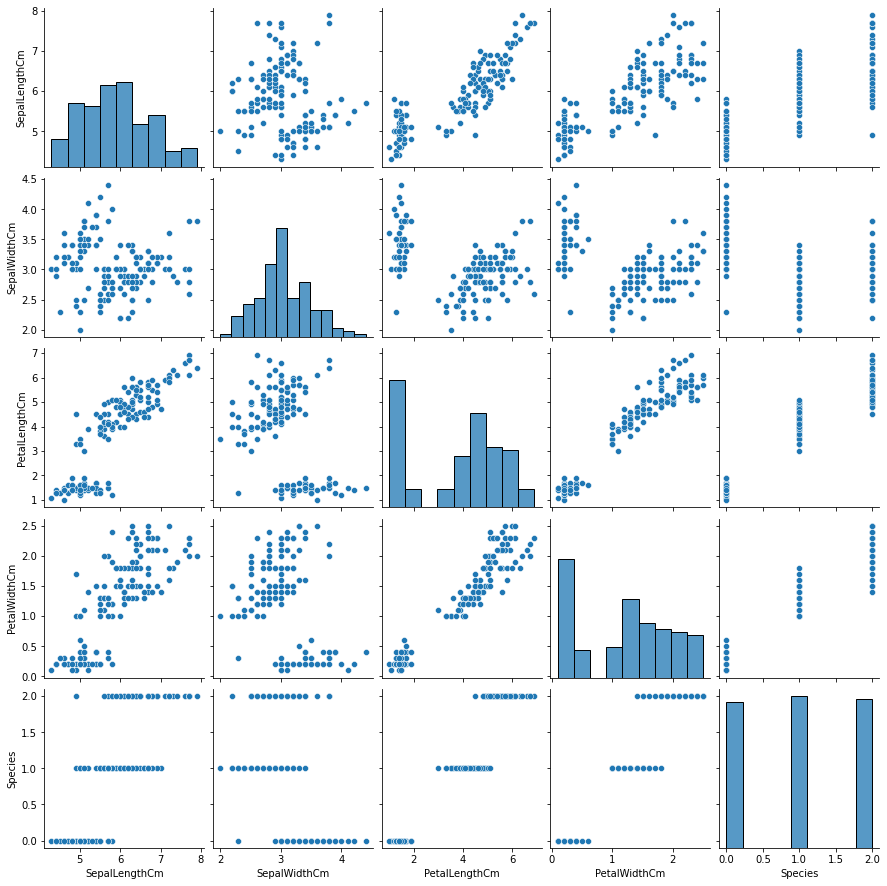

In [11]:
sns.pairplot(data,palette="inferno")

## Elbow Method 

In [12]:
#finding the optimum number of clusters
within_cluster_sum_of_square = []
clusters_range = range(1, 15)
for k in clusters_range:
    km = KMeans(n_clusters=k,init='k-means++',random_state = 1)
    km = km.fit(data)
    within_cluster_sum_of_square.append(km.inertia_)

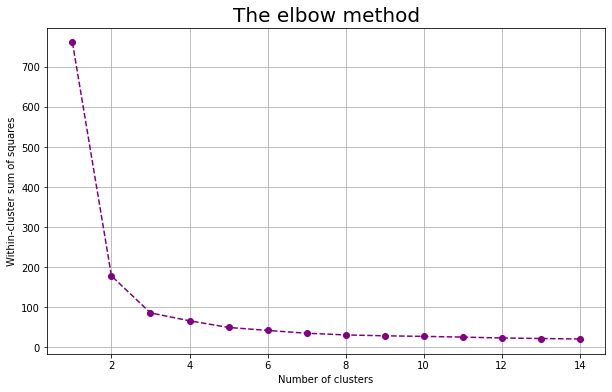

In [13]:
plt.figure(figsize=(10,6))
plt.plot(clusters_range, within_cluster_sum_of_square, "o--", color="purple")
plt.title("The elbow method",fontsize=20)
plt.xlabel("Number of clusters")
plt.ylabel("Within-cluster sum of squares")
plt.grid()
plt.show()

The optimum value for K would be 3. As we can see that with an increase in the number of clusters the WCSS value decreases. We select the value for K on the basis of the rate of decrease in WCSS and we can see that after 3 the drop in wcss is minimal.

## Visualization of k-means Clustering on the Data

In [14]:
model = KMeans(n_clusters=3, init="k-means++", max_iter=300, n_init=10, random_state=1)
predictions = model.fit_predict(data)

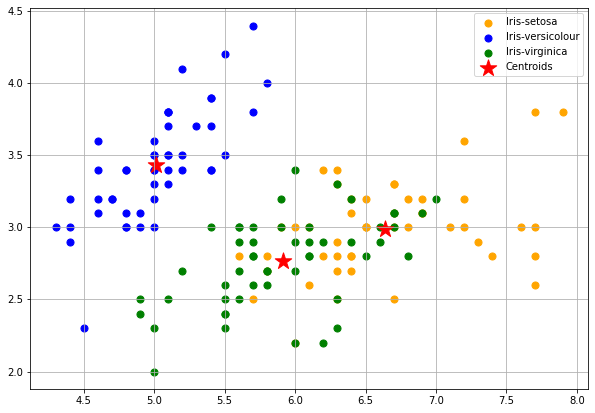

In [23]:
plt.figure(figsize=(10, 7))
data1 = data.iloc[:, [0, 1, 2, 3]].values
plt.scatter(data1[predictions==0, 0], data1[predictions==0, 1], s=50, c="orange", label="Iris-setosa")
plt.scatter(data1[predictions==1, 0], data1[predictions==1, 1], s=50, c="blue", label="Iris-versicolour")
plt.scatter(data1[predictions==2, 0], data1[predictions==2, 1], s=50, c="green", label="Iris-virginica")

plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s=300, c="red",marker='*', label="Centroids")
plt.legend()
plt.grid()
plt.show()